### Support Vector Classifier implementation 

In [99]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [100]:
#create synthetic data points 
from sklearn.datasets import make_classification


In [101]:
X,y =make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [102]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.30 , random_state=42)  

<Axes: xlabel='0', ylabel='1'>

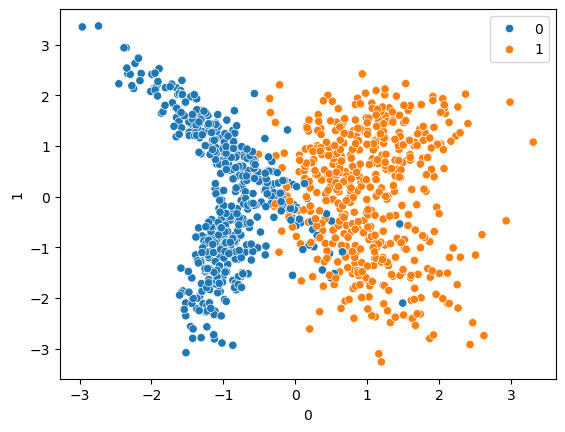

In [103]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [104]:
from sklearn.svm import SVC


In [105]:
svc = SVC(  kernel='linear')

In [106]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [107]:
#predictions 

y_pred = svc.predict(X_test)

In [108]:
from sklearn.metrics import classification_report,confusion_matrix

In [109]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       160
           1       0.96      0.94      0.95       140

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

[[154   6]
 [  8 132]]


In [110]:
rbf=SVC(kernel='rbf')


In [111]:
rbf.fit(X_train,y_train)


SVC()

In [112]:
y_pred1 = rbf.predict(X_test)

In [113]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       160
           1       0.96      0.96      0.96       140

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

[[155   5]
 [  6 134]]


#### Hyperparameter tuning with svc

In [114]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [115]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [116]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.943 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.971 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.957 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.957 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.936 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.943 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.957 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.971 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.943 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [117]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [118]:
## Prediction
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       160
           1       0.96      0.96      0.96       140

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

[[154   6]
 [  6 134]]
